In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

from graphics import bar_plot_by_category_from_multy_sheets

In [37]:
dfs = pd.read_excel('mis_gastos.xlsx',engine = "openpyxl", sheet_name= None )
file_categorias = "categorias.json"
comercio_categoria_dict = json.load(open(file_categorias))
categories = list(set(list(comercio_categoria_dict.values())))

In [38]:
selection = widgets.Dropdown(
    options= categories,
    description='Category:',
    disabled=False,
)
display(selection)

Dropdown(description='Category:', options=('servicios de internet', 'ropa', 'tabaco', 'cosmético', 'muebles', …

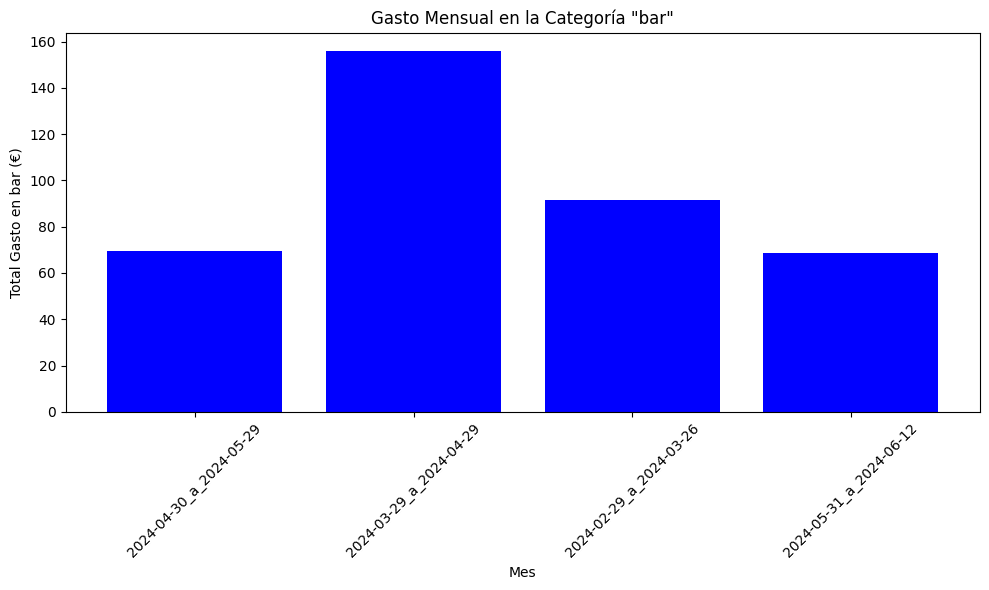

In [44]:
bar_plot_by_category_from_multy_sheets(dfs, selection.value)